In [13]:
!git clone https://github.com/Deepsphere-AI/IndustryUseCases.git

Cloning into 'IndustryUseCases'...
remote: Enumerating objects: 77054, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 77054 (delta 50), reused 105 (delta 24), pack-reused 76918
Receiving objects: 100% (77054/77054), 1.20 GiB | 34.25 MiB/s, done.
Resolving deltas: 100% (362/362), done.
Checking out files: 100% (34672/34672), done.


In [15]:
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
class knowledge_graph:
  def __init__(self):
    pass
  
  def get_entity_relation(self):
    vAR_subject_list = []
    vAR_relation_list = []
    vAR_object_list = []

    with open("/content/IndustryUseCases/ConversationalAI-swarna/DSAI_University_Data_1") as data:
      file = csv.reader(data,delimiter=',')
      for row in file:
        vAR_subject_list.append(row[0])
        vAR_relation_list.append('available_at')
        vAR_object_list.append(row[1])
    with open("/content/IndustryUseCases/ConversationalAI-swarna/DSAI_Course_Data_1") as data:
      file = csv.reader(data,delimiter=',')
      for row in file:
        vAR_subject_list.append('Deepsphere.AI')
        vAR_relation_list.append('avails')
        vAR_object_list.append(row[0])
    with open("/content/IndustryUseCases/ConversationalAI-swarna/DSAI_Student_Data_1") as data:
        file = csv.reader(data, delimiter=',')
        for row in file:
          # print(row)
          vAR_subject_list.append(row[0])
          vAR_relation_list.append('enrolled')
          if row[3] == '':
            vAR_object_list.append('none')
          else:
            vAR_object_list.append(row[3])

    self.dF_pairs = pd.DataFrame(list(zip(vAR_subject_list,vAR_relation_list,vAR_object_list)), columns=['subject', 'relation', 'object'])
    # print(self.dF_pairs.head())
    print(self.dF_pairs)
  
  def create_KG(self):
    vAR_k_graph = nx.from_pandas_edgelist(self.dF_pairs, 'subject', 'object',create_using=nx.MultiDiGraph())
    vAR_node_deg = nx.degree(vAR_k_graph)
    vAR_layout = nx.spring_layout(vAR_k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(120, 90), dpi=80)
    nx.draw_networkx(
        vAR_k_graph,
        node_size=[int(deg[1]) * 500 for deg in vAR_node_deg],
        arrowsize=20,
        linewidths=1.5,
        pos=vAR_layout,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        )
    vAR_labels = dict(zip(list(zip(self.dF_pairs.subject, self.dF_pairs.object)),self.dF_pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(vAR_k_graph, pos=vAR_layout, edge_labels=vAR_labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()

  def subject_specific_KG(self):
    # print('Available students')
    # print('\n',self.dF_pairs.subject) input('Enter any student name')
    vAR_node = 'Sunitha'
    vAR_k_graph = nx.from_pandas_edgelist(self.dF_pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    vAR_edges = nx.dfs_successors(vAR_k_graph, vAR_node)
    vAR_nodes = []
    for k, v in vAR_edges.items():
        vAR_nodes.extend([k])
        vAR_nodes.extend(v)
    vAR_subgraph = vAR_k_graph.subgraph(vAR_nodes)
    vAR_layout = (nx.random_layout(vAR_k_graph))
    nx.draw_networkx(vAR_subgraph,
        node_size=800,
        arrowsize=10,
        linewidths=1,
        pos=vAR_layout,
        edge_color='purple',
        edgecolors='green',
        node_color='white'
        )
    vAR_labels = dict(zip((list(zip(self.dF_pairs.subject, self.dF_pairs.object))),
                    self.dF_pairs['relation'].tolist()))
    vAR_edges= tuple(vAR_subgraph.out_edges(data=False))
    sublabels ={k: vAR_labels[k] for k in vAR_edges}
    nx.draw_networkx_edge_labels(vAR_subgraph, pos=vAR_layout, edge_labels=sublabels,
                                font_color='red')
    plt.axis('off')
    plt.show()

  def run_all(self):
    self.get_entity_relation()
    self.create_KG()
    self.subject_specific_KG()

          subject      relation  \
0   Deepsphere.AI  available_at   
1   Deepsphere.AI        avails   
2   Deepsphere.AI        avails   
3   Deepsphere.AI        avails   
4   Deepsphere.AI        avails   
..            ...           ...   
70        Sunitha      enrolled   
71        Sunitha      enrolled   
72        Sunitha      enrolled   
73        Sunitha      enrolled   
74        Sunitha      enrolled   

                                               object  
0   https://github.com/Deepsphere-AI/IndustryUseCases  
1      Human Resource - Automatic Question Generation  
2          Human Resource - Automatic Text Generation  
3   Consumer - Data Engineering Framework - Data l...  
4              Healthcare - VoiceToTextClassification  
..                                                ...  
70             Healthcare - VoiceToTextClassification  
71                     Customer Churn - Feature Tools  
72                                            XGBoost  
73                 

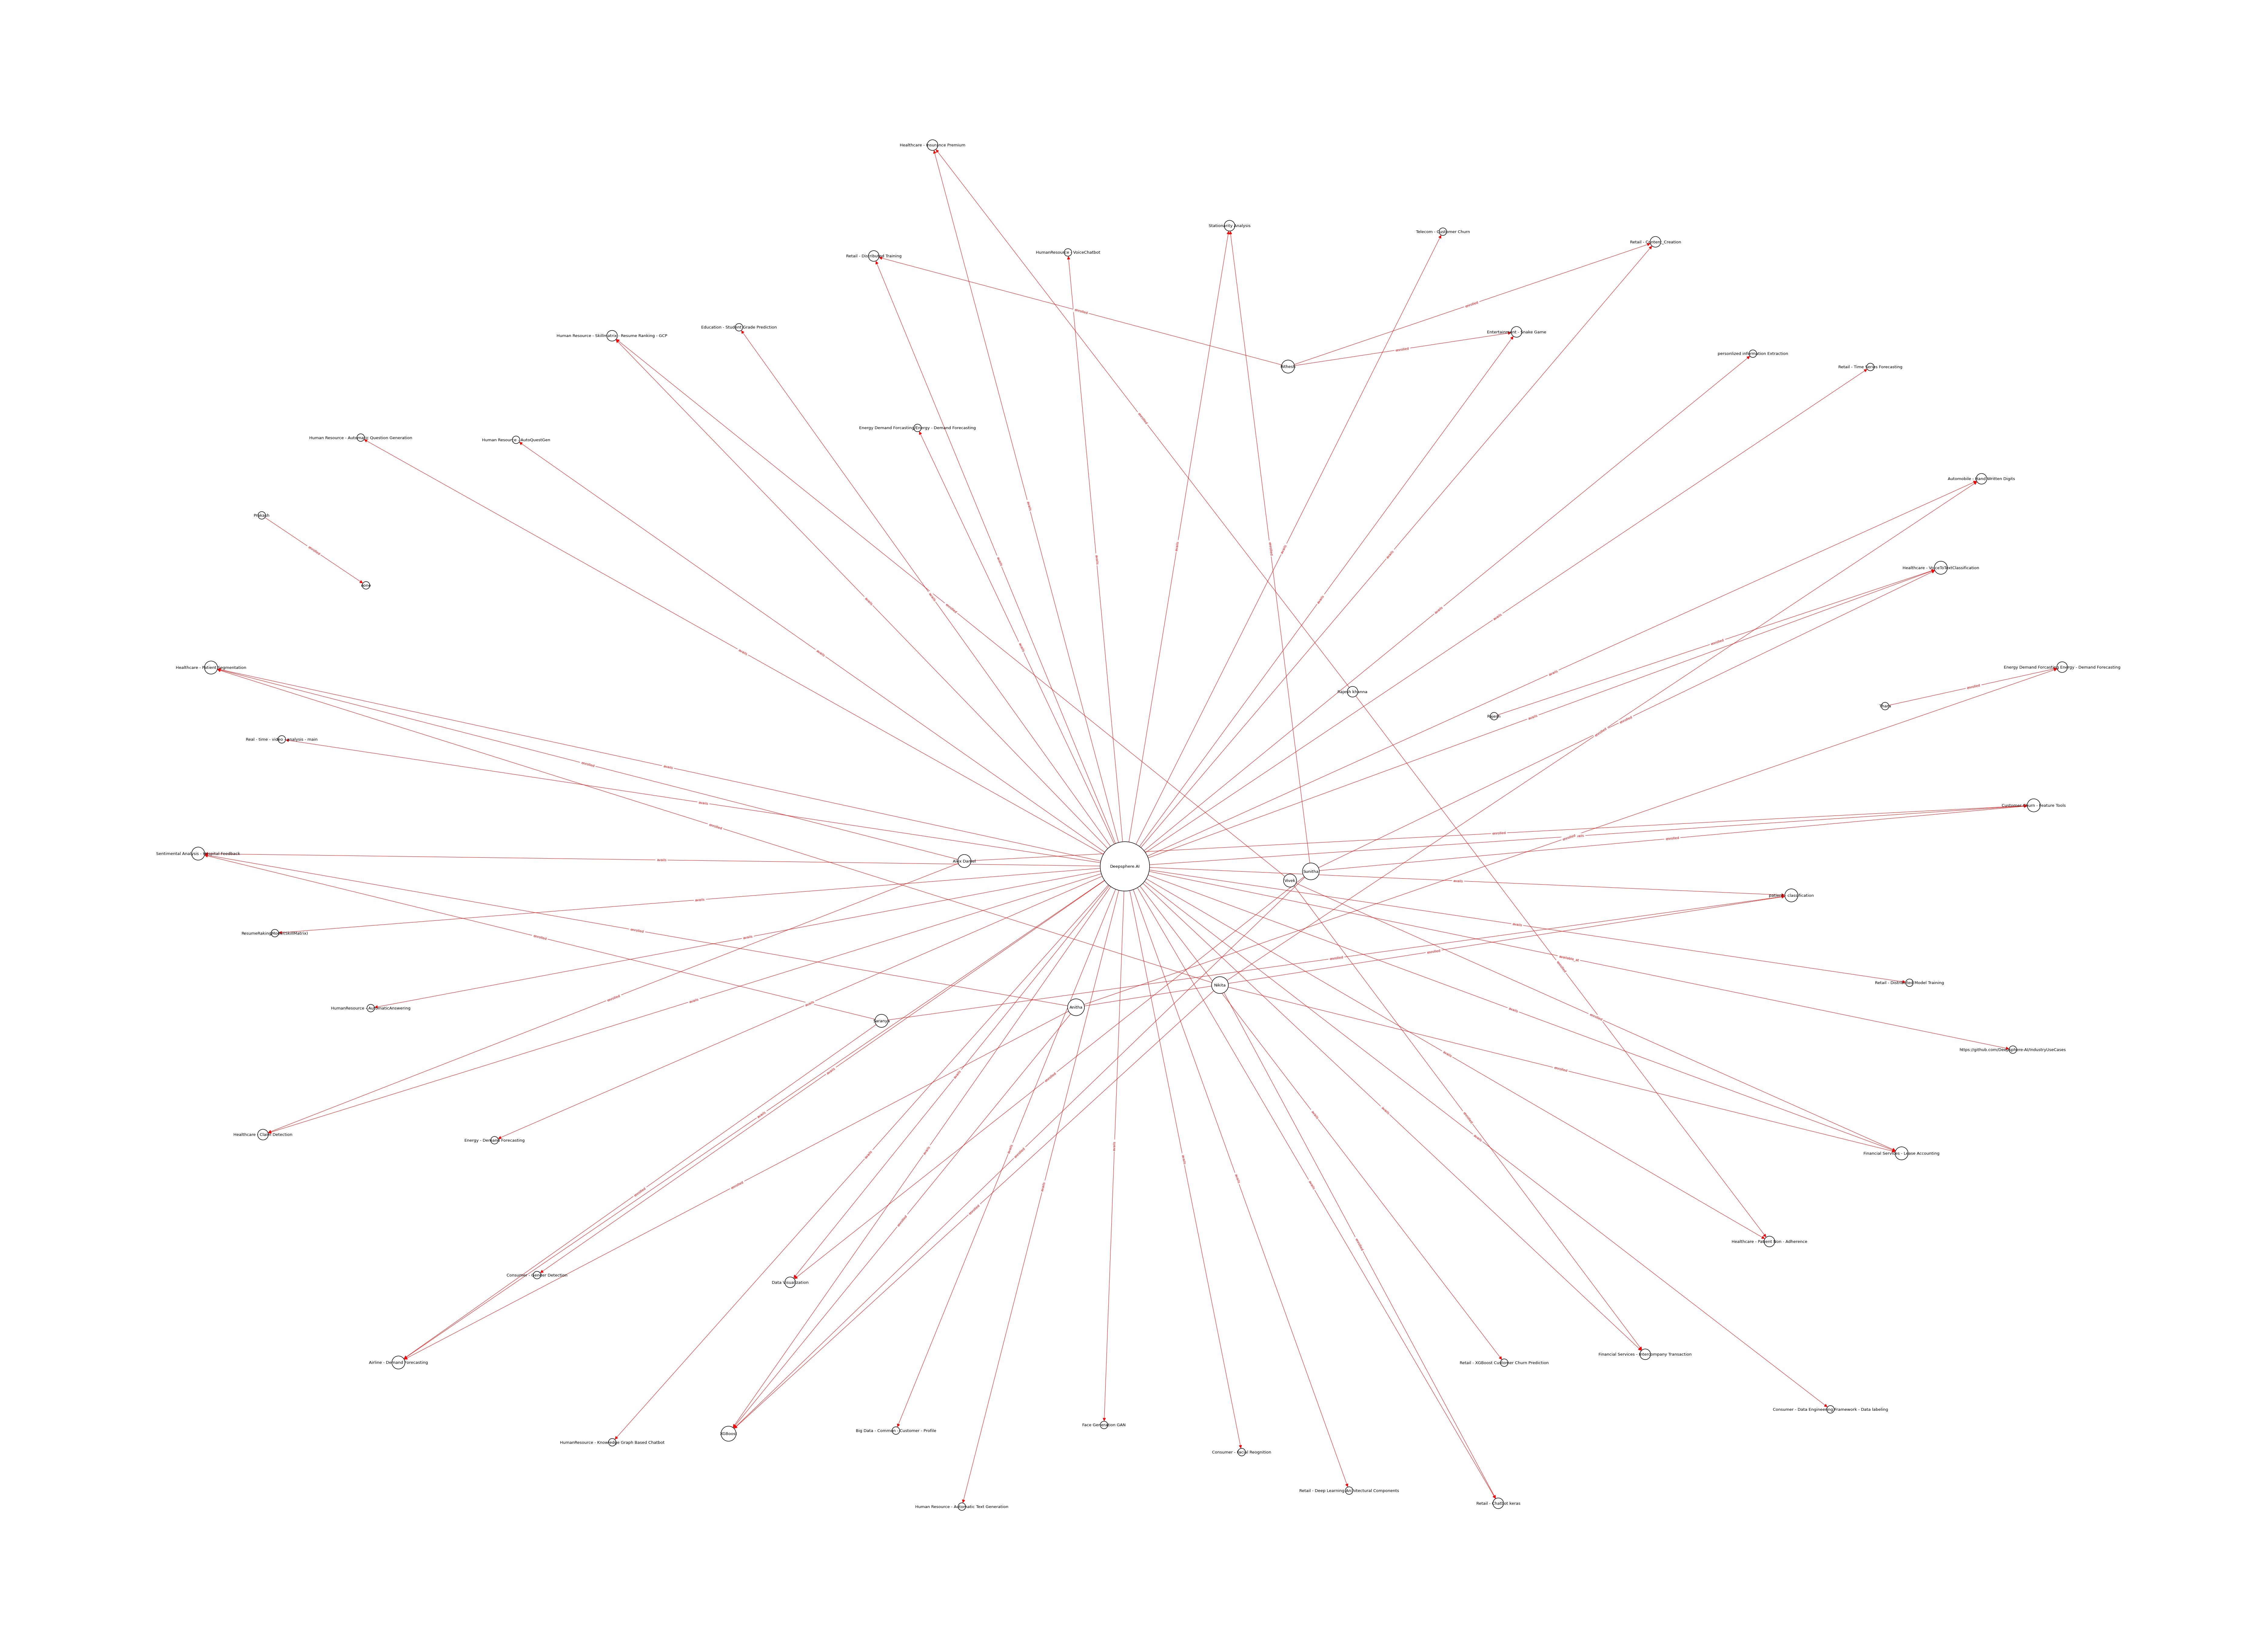

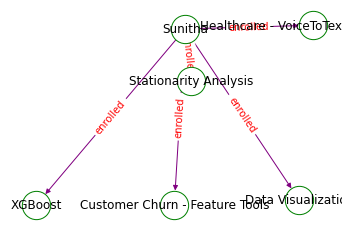

In [52]:
oBJ = knowledge_graph()
oBJ.run_all()